Import of libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In total, the dataset contains 159 objects. We have reserved a part of the dataset for the baseline task. In this assignment, it is assumed to work with a dataset containing 119 objects.

# 0. Application of polynomial regression to predict a continuous parameter

The provided dataset consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

Use <code>train_test_split()</code> to split the dataset into training and test samples with the parameters specified in your assignment. Use stratification by column <code>Species</code>. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

In [85]:
random_state = 23

df = pd.read_csv('fish_train.csv')
df.head()

X,y = df.drop('Weight', axis =1), df.Weight
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =random_state, stratify =df['Species'])

Find sample mean for the column <code>Width</code> of the obtained training sample.

In [86]:
mean_width = X_train.Width.mean()
print(round(mean_width, 3))

4.449


# 1. Building a base model

Remove categorical features and train a linear regression model (<code>LinearRegression()</code>) on the training dataset. Perform predictions on the test dataset. 
Evaluate the model using the metric <code>r2_score()</code>.

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_basic = LinearRegression().fit(X_train.drop(['Species'], axis =1), y_train)
r2_score(y_test, model_basic.predict(X_test.drop(['Species'], axis =1)))

0.8885408749541964

In [88]:
X_train

,Species,Length1,Length2,Length3,Height,Width
84,Smelt,11.4,12.0,13.2,2.2044,1.1484
32,Roach,24.0,26.0,29.2,8.8768,4.4968
82,Pike,56.0,60.0,64.0,9.6000,6.1440
3,Bream,36.2,39.5,45.3,18.7542,6.7497
24,Bream,28.7,31.0,36.2,14.3714,4.8146
...,...,...,...,...,...,...
60,Pike,40.1,43.0,45.8,7.7860,5.1296
112,Perch,34.6,37.0,39.3,10.5717,6.3666
42,Perch,20.7,22.7,24.2,5.9532,3.6300
63,Perch,19.0,21.0,22.5,5.6925,3.6675


# 2. Adding feature preprocessing

## Use of PCA

Using, for example, <code>sns.heatmap()</code>, construct a feature correlation matrix of the training dataset and identify the top three most correlated features.

<Axes: >

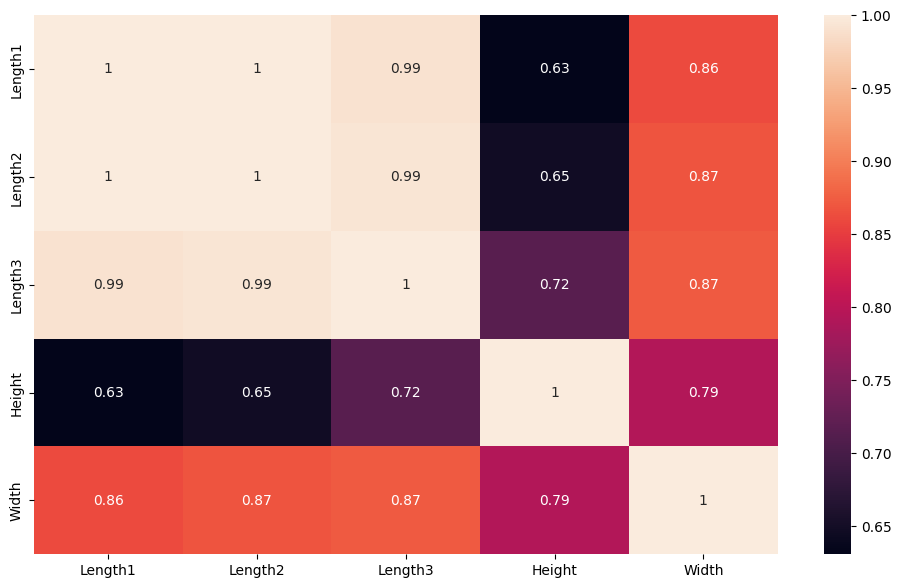

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,7))
sns.heatmap(X_train.drop(['Species'], axis =1).corr(), annot =True)

Linear models respond rather poorly to correlated features, so it makes sense to get rid of such features before training begins.

Use the principal component analysis to reduce the number of uninformative dimensions.

1) Apply the principal component analysis (<code>PCA(n_components=3, svd_solver='full')</code>) to the three most correlated features found. 

2) Calculate the explained variance ratio when using only the first principal component.

3) Replace the top three most correlated features with the new feature <code>Lengths</code> whose values coincide with the scores for the first principal component.

In [91]:
from sklearn.decomposition import PCA

lengths = X_train[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components = 3, svd_solver = 'full').fit(lengths)

X_train = X_train.drop(['Length1', 'Length2', 'Length3'], axis =1)
X_train['Lengths'] = pca.transform(lengths)[:,0]
print(pca.explained_variance_ratio_[0])

0.9960410310578471


In [92]:
X_train

,Species,Height,Width,Lengths
84,Smelt,2.2044,1.1484,-28.388897
32,Roach,8.8768,4.4968,-3.693502
82,Pike,9.6000,6.1440,54.516232
3,Bream,18.7542,6.7497,20.562715
24,Bream,14.3714,4.8146,6.029988
...,...,...,...,...
60,Pike,7.7860,5.1296,24.969165
112,Perch,10.5717,6.3666,14.553212
42,Perch,5.9532,3.6300,-10.452423
63,Perch,5.6925,3.6675,-13.391637


Apply the obtained transformation for the same features in the test dataset. Note that it is not necessary to re-train the `PCA` transformation. Similarly to the previous step, replace the three considered features by one.

In [95]:
# lengths_test = X_test[['Length1', 'Length2', 'Length3']]
X_test = X_test.drop(['Length1', 'Length2', 'Length3'], axis =1)
pca = PCA(n_components = 3, svd_solver = 'full').fit(lengths_test)
X_test['Lengths'] = pca.transform(lengths_test)[:,0]
print(pca.explained_variance_ratio_[0])

0.9969447966474713


In [96]:
X_test

,Species,Height,Width,Lengths
31,Whitefish,11.7612,6.5736,10.041396
62,Pike,7.2800,4.3225,20.574557
43,Roach,6.4000,3.8000,-13.729785
26,Bream,13.7592,4.3680,2.775425
80,Parkki,11.3680,4.2340,-7.691221
27,Perch,12.5125,7.4165,20.916675
64,Perch,10.0300,6.0180,2.798921
114,Parkki,11.0880,4.1440,-9.420562
57,Perch,6.7920,3.6240,-14.667554
30,Bream,14.4738,5.7276,6.365166


Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions on the test dataset and evaluate the model using <code>r2_score()</code>.

In [97]:
model_basic = LinearRegression().fit(X_train.drop(['Species'], axis =1), y_train)
res = r2_score(y_test, model_basic.predict(X_test.drop(['Species'], axis =1)))
print(round(res,3))

0.878


It can be seen that the quality of the model has not changed significantly.

## Feature engineering

Plot the dependencies of the features on the target feature, e.g., by using <code>sns.pairplot()</code>.

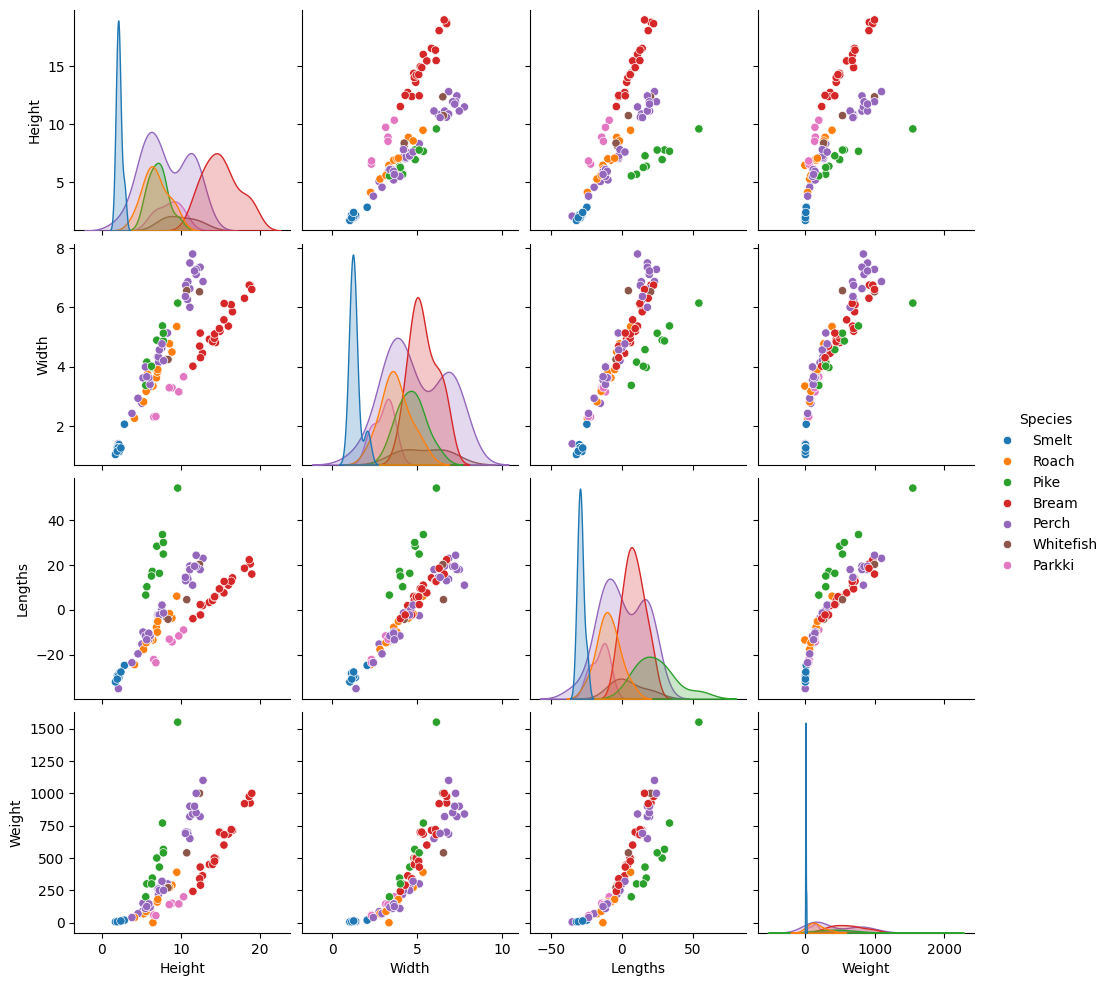

In [21]:
sns.pairplot(pd.concat([X_train, y_train], axis =1), hue = 'Species')

It can be seen that the mass, in general, does not depend linearly on the other features. So, in order for the linear model to do a proper predictions, it makes sense to transform the features so that the dependence becomes more similar to a linear one. But how to come up with such a dependence?

It is logical to assume that the mass of a fish should somehow smoothly depend on the other parameters responsible in one way or another for its size. If we remember that mass is the product of density by volume, then

$$
m = \rho \cdot V.
$$

Suppose that the average density of all fish is the same, and recall that in homothety the volume of the object depends on the linear dimensions as a cube, then we obtain

$$
m\sim V\sim d^3
$$

Take to the third degree all the features of training and test datasets that are responsible in one way or another for the fish size (<code>Height, Width, Lengths</code>), and check whether the dependence of mass on these features has become linear.

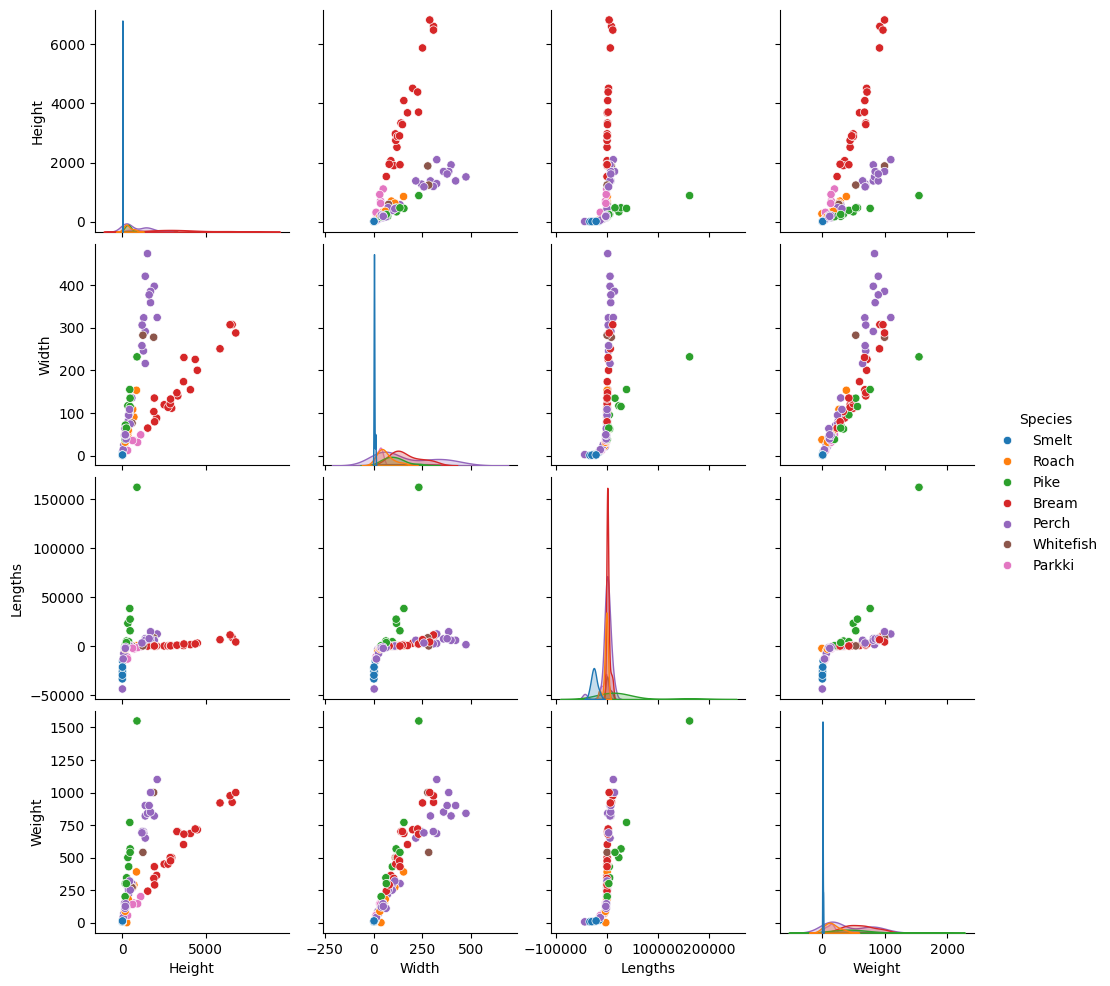

In [57]:
X_train_cube = X_train.copy()
X_test_cube = X_test.copy()

X_train_cube[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']]**3
X_test_cube[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']]**3

sns.pairplot(pd.concat([X_train_cube, y_train], axis =1), hue ='Species')

Enter the sample mean for the column <code>Width</code> of the training dataset after cubeization.

In [66]:
round(X_train_cube.Width.mean(),3)

124.418

Choose the images corresponding to the dependence of <code>Weight</code> on <code>Width</code> before the transformation and after.

Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions for the test dataset, evaluate the model using `r2_score()`.

In [79]:
model_basic = LinearRegression().fit(X_train_cube.drop(['Species'], axis =1), y_train)
res= r2_score(y_test, model_basic.predict(X_test_cube.drop(['Species'], axis =1)))
print(round(res,3))

0.943


In [72]:
X_train = X_train_cube
X_train_cube.head()

,Species,Height,Width,Lengths
84,Smelt,10.712016,1.514536,-22879.447603
32,Roach,699.470343,90.930738,-50.386596
82,Pike,884.736000,231.928234,162023.305754
3,Bream,6596.227555,307.505871,8694.434838
24,Bream,2968.227824,111.604225,219.254874


In [73]:
X_test = X_test_cube
X_test_cube

,Species,Height,Width,Lengths
31,Whitefish,1626.877698,284.059829,1012.470224
62,Pike,385.828352,80.761617,8709.465054
43,Roach,262.144000,54.872000,-2588.160412
26,Bream,2604.830992,83.338924,21.379052
80,Parkki,1469.102828,75.901885,-454.973281
27,Perch,1958.990236,407.940668,9151.197224
64,Perch,1009.027027,217.949838,21.926625
114,Parkki,1363.200233,71.163818,-836.046413
57,Perch,313.323545,47.595355,-3155.535725
30,Bream,3032.129192,187.896219,257.886864


Note how such uncomplicated feature work helped dramatically improve the quality of the model!

## Adding categorical features

Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using pd.get_dummies(). Train the linear regression model. Enter r2_score() of the obtained model.

Perform the <code>one-hot</code> encoding of the categorial feature `Species`, e.g., using <code>pd.get_dummies()</code>.

Train a linear regression model on the obtained training dataset. Perform predictions for the test dataset, evaluate the model using the <code>r2_score()</code>.

<b>Note</b>: We purposely used stratified splitting so that all values of a categorical feature <code>Species</code> are present in all datasets. But this is not always possible. You can read about how to deal with this problem, for example, [here](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [74]:
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies= pd.get_dummies(X_test)

X_train_dummies

,Height,Width,Lengths,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
84,10.712016,1.514536,-22879.447603,False,False,False,False,False,True,False
32,699.470343,90.930738,-50.386596,False,False,False,False,True,False,False
82,884.736000,231.928234,162023.305754,False,False,False,True,False,False,False
3,6596.227555,307.505871,8694.434838,True,False,False,False,False,False,False
24,2968.227824,111.604225,219.254874,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
60,472.001304,134.974119,15567.255426,False,False,False,True,False,False,False
112,1181.502082,258.061189,3082.311862,False,False,True,False,False,False,False
42,210.984922,47.832147,-1141.960215,False,False,True,False,False,False,False
63,184.462936,49.329915,-2401.601781,False,False,True,False,False,False,False


In [75]:
model_basic = LinearRegression().fit(X_train_dummies, y_train)
r2_score(y_test, model_basic.predict(X_test_dummies))

0.9617818787783028

Once again, the quality has increased.

It can be seen that after `one-hot` encoding the features became correlated. You can get rid of this, for example, by using the `drop_first=True` parameter. Re-train the model after correcting this flaw. Perform predictions for the test dataset, evaluate the model using <code>r2_score()</code>.

In [76]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test= pd.get_dummies(X_test, drop_first = True)

X_train

,Height,Width,Lengths,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
84,10.712016,1.514536,-22879.447603,False,False,False,False,True,False
32,699.470343,90.930738,-50.386596,False,False,False,True,False,False
82,884.736000,231.928234,162023.305754,False,False,True,False,False,False
3,6596.227555,307.505871,8694.434838,False,False,False,False,False,False
24,2968.227824,111.604225,219.254874,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
60,472.001304,134.974119,15567.255426,False,False,True,False,False,False
112,1181.502082,258.061189,3082.311862,False,True,False,False,False,False
42,210.984922,47.832147,-1141.960215,False,True,False,False,False,False
63,184.462936,49.329915,-2401.601781,False,True,False,False,False,False


In [78]:
model_basic = LinearRegression().fit(X_train, y_train)
res = r2_score(y_test, model_basic.predict(X_test))
print(round(res,3))

0.962


On such a relatively small dataset, though, we see no difference.